## Importing Packages and Data

In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import math
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# Load dataset

df = pd.read_csv('C:/Users/Norberto/OneDrive/Documents/IT3/MHSG/Surgery_Cases-Duration-Test1.csv')                

In [3]:
df = df[list(filter(None, df))]

In [4]:
parse_dates=[['Start Date/Time'], ['Procedure Start Date/Time'], ['Procedure Stop Date/Time']]

In [5]:
df.head()

,Start Date/Time,Surgical Case Key,Institution,Preop Diagnosis,Procedure Start Date/Time,Procedure Stop Date/Time,Procedure Duration
0,7/7/2020 12:43,42808,MADI Madigan,Cataract,7/7/2020 12:43,7/7/2020 13:07,24.0
1,7/22/2020 8:18,46273,MADI Madigan,Symptomatic Macromastia,7/22/2020 8:18,7/22/2020 11:50,212.0
2,7/24/2020 8:00,47047,MADI Madigan,left wrist tfcc tear,7/24/2020 8:00,7/24/2020 8:35,35.0
3,7/1/2020 8:55,46797,MADI Madigan,Snoring,7/1/2020 8:55,7/1/2020 9:44,49.0
4,7/22/2020 7:48,46809,MADI Madigan,Sleep disorder breathing,7/22/2020 7:48,7/22/2020 8:37,49.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 7 columns):
Start Date/Time              963 non-null object
Surgical Case Key            1332 non-null int64
Institution                  1332 non-null object
Preop Diagnosis              957 non-null object
Procedure Start Date/Time    963 non-null object
Procedure Stop Date/Time     959 non-null object
Procedure Duration           959 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 73.0+ KB


## Wrangle the data

In [7]:
# Rename the columns

df.columns = ['Date_Time', 'Case_ID', 'MTF', 'Diagnosis', 'Proc_Start', 'Proc_Stop', 'Duration']
df.head()

,Date_Time,Case_ID,MTF,Diagnosis,Proc_Start,Proc_Stop,Duration
0,7/7/2020 12:43,42808,MADI Madigan,Cataract,7/7/2020 12:43,7/7/2020 13:07,24.0
1,7/22/2020 8:18,46273,MADI Madigan,Symptomatic Macromastia,7/22/2020 8:18,7/22/2020 11:50,212.0
2,7/24/2020 8:00,47047,MADI Madigan,left wrist tfcc tear,7/24/2020 8:00,7/24/2020 8:35,35.0
3,7/1/2020 8:55,46797,MADI Madigan,Snoring,7/1/2020 8:55,7/1/2020 9:44,49.0
4,7/22/2020 7:48,46809,MADI Madigan,Sleep disorder breathing,7/22/2020 7:48,7/22/2020 8:37,49.0


In [8]:
# Change Surgical Case Key to object

df['Case_ID'] = df.Case_ID.astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 7 columns):
Date_Time     963 non-null object
Case_ID       1332 non-null object
MTF           1332 non-null object
Diagnosis     957 non-null object
Proc_Start    963 non-null object
Proc_Stop     959 non-null object
Duration      959 non-null float64
dtypes: float64(1), object(6)
memory usage: 73.0+ KB


In [9]:
# Make 'Date_Time' the index of the DataFrame.

df.set_index('Date_Time', inplace=True)

df.head()

,Case_ID,MTF,Diagnosis,Proc_Start,Proc_Stop,Duration
Date_Time,,,,,,
7/7/2020 12:43,42808,MADI Madigan,Cataract,7/7/2020 12:43,7/7/2020 13:07,24.0
7/22/2020 8:18,46273,MADI Madigan,Symptomatic Macromastia,7/22/2020 8:18,7/22/2020 11:50,212.0
7/24/2020 8:00,47047,MADI Madigan,left wrist tfcc tear,7/24/2020 8:00,7/24/2020 8:35,35.0
7/1/2020 8:55,46797,MADI Madigan,Snoring,7/1/2020 8:55,7/1/2020 9:44,49.0
7/22/2020 7:48,46809,MADI Madigan,Sleep disorder breathing,7/22/2020 7:48,7/22/2020 8:37,49.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1332 entries, 7/7/2020 12:43 to 7/31/2020 8:20
Data columns (total 6 columns):
Case_ID       1332 non-null object
MTF           1332 non-null object
Diagnosis     957 non-null object
Proc_Start    963 non-null object
Proc_Stop     959 non-null object
Duration      959 non-null float64
dtypes: float64(1), object(5)
memory usage: 72.8+ KB


In [11]:
df.describe()

,Duration
count,959.000000
mean,86.479666
std,81.584513
min,1.000000
25%,33.000000
50%,62.000000
75%,112.000000
max,696.000000


In [12]:
df.isnull()

,Case_ID,MTF,Diagnosis,Proc_Start,Proc_Stop,Duration
Date_Time,,,,,,
7/7/2020 12:43,False,False,False,False,False,False
7/22/2020 8:18,False,False,False,False,False,False
7/24/2020 8:00,False,False,False,False,False,False
7/1/2020 8:55,False,False,False,False,False,False
7/22/2020 7:48,False,False,False,False,False,False
...,...,...,...,...,...,...
7/27/2020 11:07,False,False,False,False,False,False
7/24/2020 21:17,False,False,False,False,False,False
7/31/2020 8:02,False,False,False,False,False,False


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1332 entries, 7/7/2020 12:43 to 7/31/2020 8:20
Data columns (total 6 columns):
Case_ID       1332 non-null object
MTF           1332 non-null object
Diagnosis     957 non-null object
Proc_Start    963 non-null object
Proc_Stop     959 non-null object
Duration      959 non-null float64
dtypes: float64(1), object(5)
memory usage: 72.8+ KB


## Exploratory Data Analysis

Text(0, 0.5, 'Duration in Minutes')

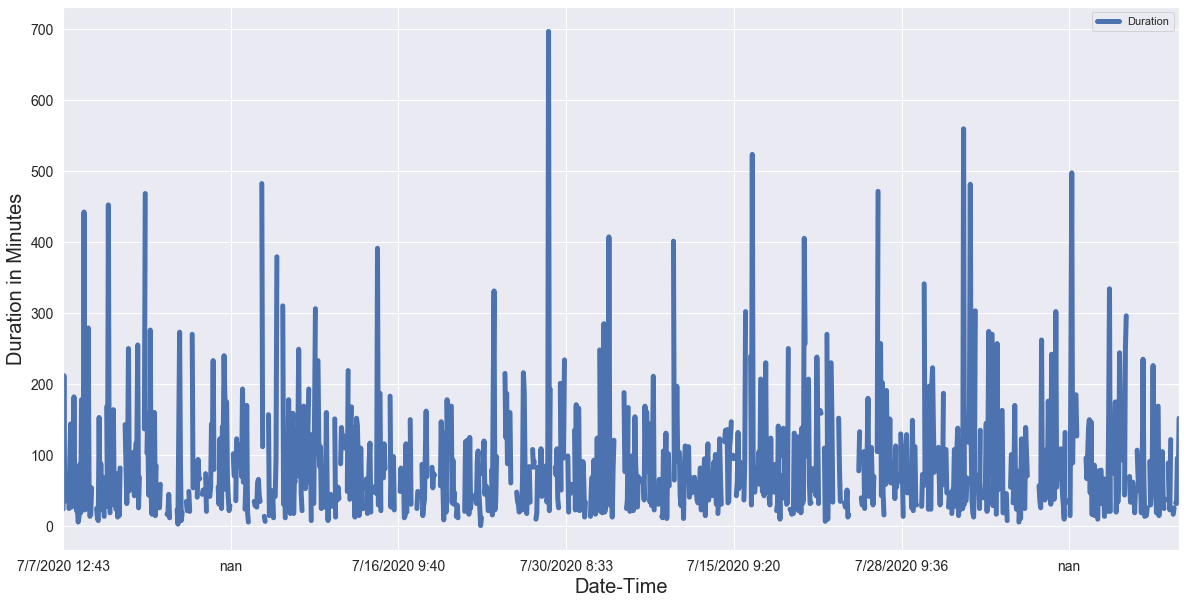

In [14]:
# Explore your DataFrame visually.

df.plot(figsize=(20,10), linewidth=5, fontsize=14)
plt.xlabel('Date-Time', fontsize=20); plt.ylabel('Duration in Minutes', fontsize=20)

In [15]:
# Plot the 'Proc_Stop' column by itself as a time series.

#df['Duration'].plot(figsize=(20,10), linewidth=5, fontsize=20)
#plt.xlabel('Date', fontsize=20); plt.ylabel('Duration in Minutes', fontsize=20)

C:\Users\Norberto\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Norberto\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 51., 142., 135., 118.,  90.,  70.,  60.,  59.,  44.,  31.,  28.,
         16.,  25.,  15.,   8.,   6.,   8.,  12.,   5.,   6.,   3.,   5.,
          1.,   2.,   3.,   0.,   0.,   1.,   2.,   2.,   0.,   1.,   1.,
          2.,   2.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1. ,  14.9,  28.8,  42.7,  56.6,  70.5,  84.4,  98.3, 112.2,
        126.1, 140. , 153.9, 167.8, 181.7, 195.6, 209.5, 223.4, 237.3,
        251.2, 265.1, 279. , 292.9, 306.8, 320.7, 334.6, 348.5, 362.4,
        376.3, 390.2, 404.1, 418. , 431.9, 445.8, 459.7, 473.6, 487.5,
        501.4, 515.3, 529.2, 543.1, 557. , 570.9, 584.8, 598.7, 612.6,
        626.5, 640.4, 654.3, 668.2, 682.1, 696. ]),
 <a list of 50 Patch objects>)

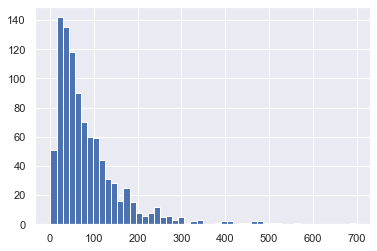

In [16]:
plt.hist(df.Duration, bins = 50)

(array([272., 264., 157., 107.,  55.,  37.,  20.,  17.,   9.,   5.,   1.,
          4.,   2.,   4.,   2.,   1.,   1.,   0.,   0.,   1.]),
 array([  1.  ,  35.75,  70.5 , 105.25, 140.  , 174.75, 209.5 , 244.25,
        279.  , 313.75, 348.5 , 383.25, 418.  , 452.75, 487.5 , 522.25,
        557.  , 591.75, 626.5 , 661.25, 696.  ]),
 <a list of 20 Patch objects>)

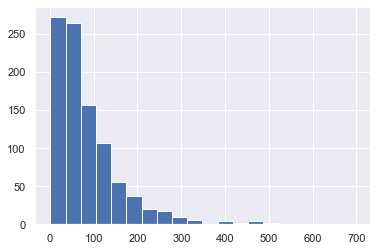

In [17]:
plt.hist(df.Duration, bins = 20)

## Trends and Seasonality in Time Series Data

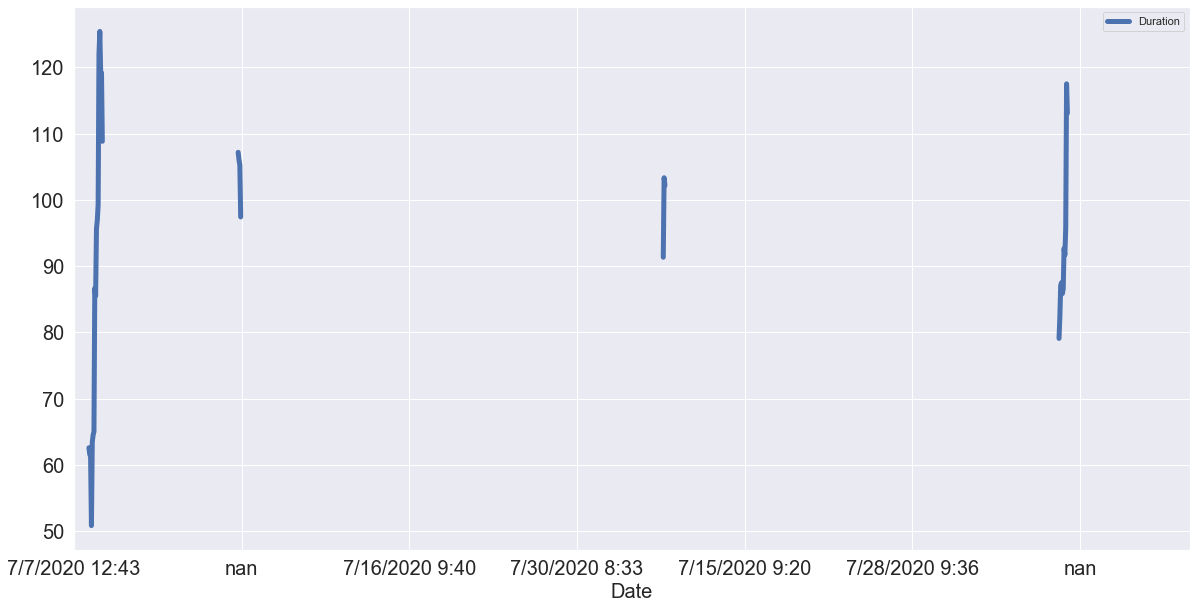

In [18]:
# Yearly seasonality

duration = df[['Duration']]
duration.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);

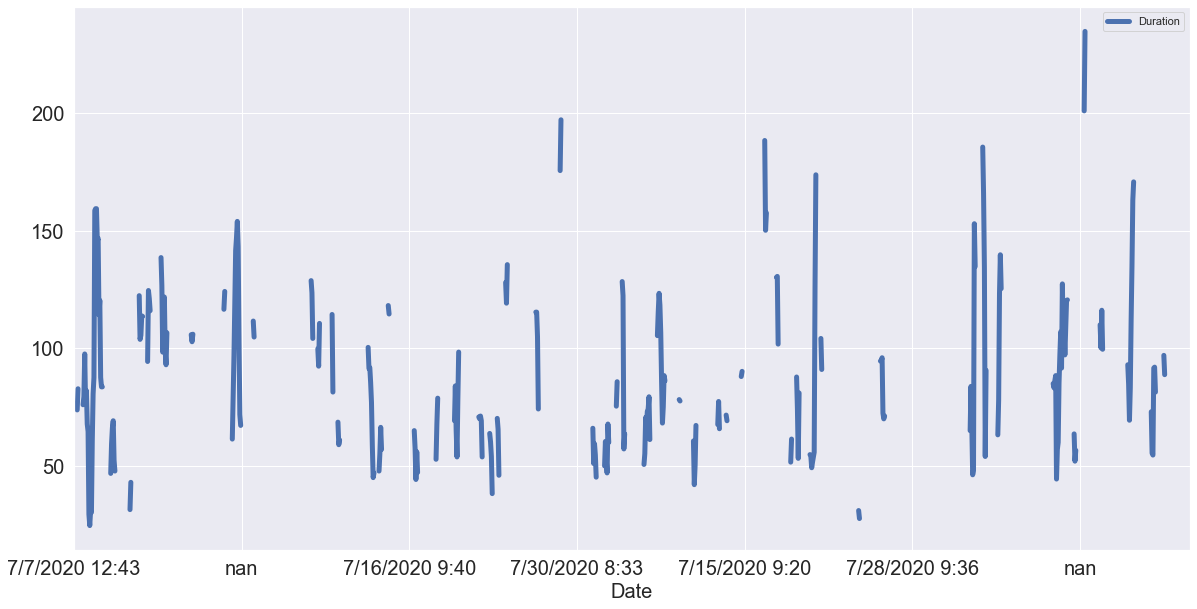

In [25]:
# Plot the rolling average of 'Duration' using built-in pandas methods with the same window size as you took for the 'Duration' data.
# Remove the seasonality.

df3 = df[['Duration']]
df3.rolling(5).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);

In [20]:
# Plotting the trends of 'gym' and 'diet' on a single figure.

#df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
#df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20)
#plt.xlabel('Year', fontsize=20);

## Seasonal Patterns in Time Series Data

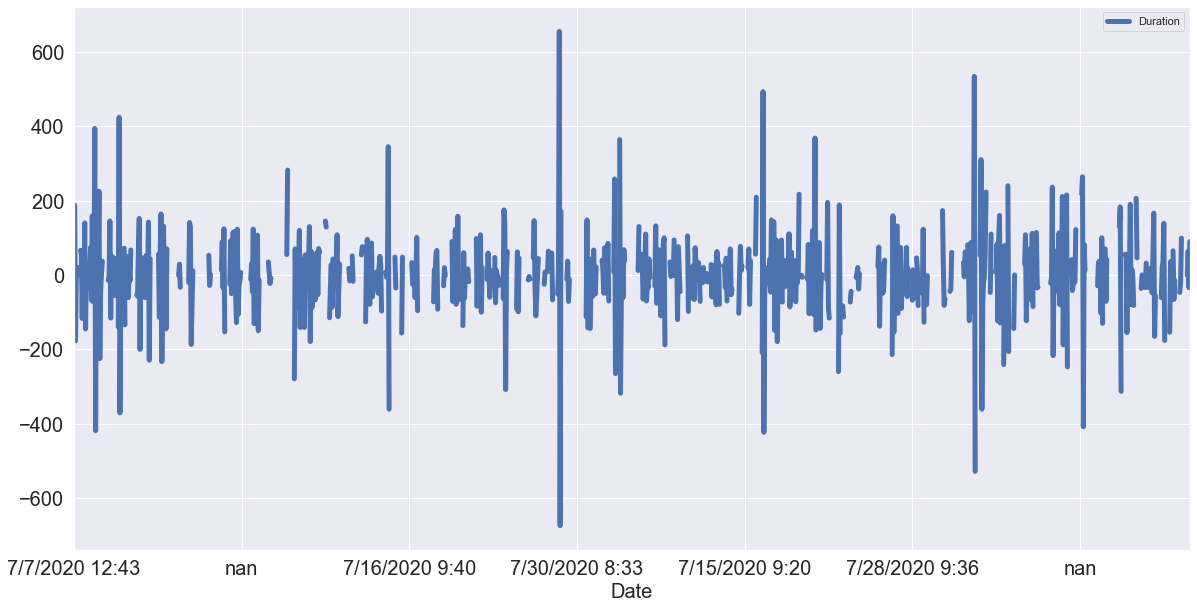

In [21]:
# First-order differencing

duration.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);

## Periodicity and Autocorrelation

In [ ]:
# Import the iris dataset from scikit-learn, turn it into a DataFrame and view the first rows.

from sklearn import datasets
iris = datasets.load_iris()
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df_iris.head()

In [ ]:
# Build a scatter plot of 'sepal length' against 'sepal width'.

sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', fit_reg=False, data=df_iris);

In [ ]:
# Build a scatter plot of 'sepal length' against 'sepal width', coloured by the target (species).

sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', fit_reg=False, data=df_iris, hue='target');

In [ ]:
# Compute the correlation coefficients of each pair of measurements.

df_iris.corr()

In [ ]:
# Compute the correlation coefficients of each pair of measurements within each species.

df_iris.groupby(['target']).corr()

In this correlation matrix, you can see that:

For target 0, the sepal length and width have a correlation of 0.75;
For target 1, you have a coefficient of 0.5; And
For target 2, you get a correlation of 0.46.

In [ ]:
# Plot all your time series again.

df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [ ]:
# Compute the correlation coefficients of all of these time series.

df.corr()

From looking at the times series, it looks as though their seasonal components would be positively correlated and their trends negatively correlated.

Plot the first-order differences of these time series and then compute the correlation of those because that will be the correlation of the seasonal components, approximately. Remember that removing the trend may reveal correlation in seasonality.


In [ ]:
# Plotting the first-order differences.

df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [ ]:
# Compute the correlation coefficients of the first-order differences of these time series.

df.diff().corr()

## Autocorrelation

In [ ]:
# Plot the autocorrelation of the 'diet' series.

pd.plotting.autocorrelation_plot(diet);

The dotted lines in the above plot actually tell you about the statistical significance of the correlation. In this case, you can say that the 'diet' series is genuinely autocorrelated with a lag of twelve months.